# End to end multi-class dog breed classifiction
this notebook builds and end-to-end multi-class image classifier using tensorflow and tensorflow hub
## 1. Problem
Identifying the breed of a dog given an image of a dog.
## 2. Data
The data we are using are from Kaggle's dog breed identification competiton.
https://www.kaggle.com/competitions/dog-breed-identification/
## 3. Evaluation
is a file with predition probabilities with each dog breed of each test image
## 4. Features
* we are dealing with images (Unstructured data) so it is probably best we use deep learning/ transfer learning
* there are 120 breeds
* there are 10000+ images in train(with labels) and test sets (no labels)

## Getting our workspace ready
* import TensorFLow ✅
* import TensorFLow Hub ✅
* make sure we are using a GPU ✅

In [1]:
# import TensorFlow and Tensorflow)hub into colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:",tf.__version__)
print("TF hub Version:",hub.__version__)

# check for GPU availbility
print("GPU","Available (Yess!!!)"if tf.config.list_physical_devices("GPU")else "not available")



TF Version: 2.17.0
TF hub Version: 0.16.1
GPU not available


## Getting our data ready (turning it into tensors)
with all machine learning models, our data has to be in numerical format

In [2]:
import pandas as pd
labels_csv=pd.read_csv("labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

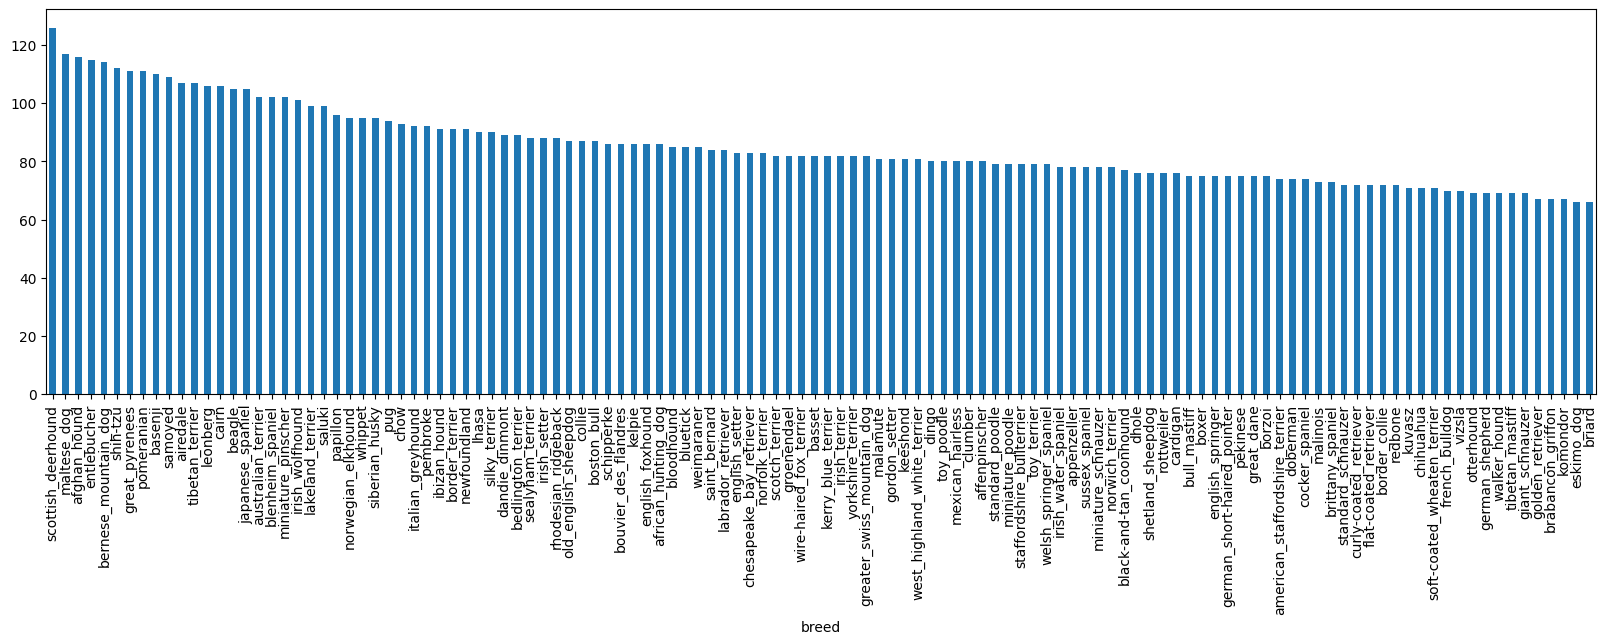

In [3]:
# how many images per breed
labels_csv['breed'].value_counts().plot.bar(figsize=(20,5))

In [4]:
labels_csv['breed'].value_counts().median()

82.0

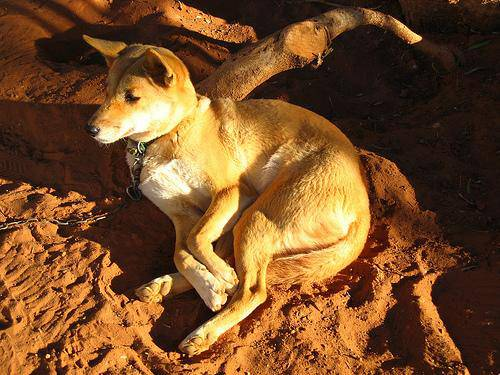

In [5]:
# viewing an image
from IPython.display import Image
Image("train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [6]:
filenames=["train/"+fname  for fname in labels_csv["id"]+".jpg"]
filenames[:10]

['train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'train/001cdf01b096e06d78e9e5112d419397.jpg',
 'train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'train/002a283a315af96eaea0e28e7163b21b.jpg',
 'train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg']

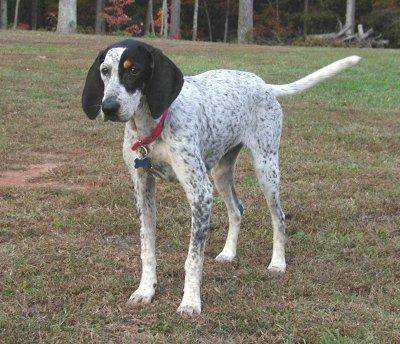

In [7]:
Image(filenames[3])

In [8]:
import os
if len(os.listdir("train"))==len(filenames):
  print("filenames match the actual number of the files")
else:
  print("filenames do not match actual number of the files")

filenames match the actual number of the files


In [9]:
labels_csv["breed"][9000]

'tibetan_mastiff'

after inserting our training image filepaths into a list, lets prepare our labels

In [10]:
import numpy as np
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [11]:
len(labels)

10222

In [12]:
# see if number of labels matches the number of filenames
if len(labels)==len(filenames):
  print("number of labels matches the number of filenames")

number of labels matches the number of filenames


In [13]:
# finding the unique label values
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
len(unique_breeds)

120

In [15]:
# turning a single label to an array of boolens
print(labels[0])
labels[0]==unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
# turning every label into a bolean arrat
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

In [18]:
# turning boolean array into integers ex:
print(labels[0])# original label
print(np.where(unique_breeds==labels[0]))# index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int))# there will be 1 wher th sample occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### creating a validation set

In [19]:
X, Y= filenames, boolean_labels

by starting off expermienting with 1000 images and increase as needed

In [20]:
# set number of images to use for experimenting
NUM_IMAGES= 1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [21]:
# splitting the data into train and validation sets

from sklearn.model_selection import  train_test_split

x_train,x_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],
                                             Y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=42)

len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

## preprocessing Images (turning images into tensors)
1. take an image file path as an input.
2. user tensorflow to read the file and save it to a variable
3. turn our image into tensor
4. resize the image to be a shape of (224,224)
5. return the modified image

In [22]:
# convert image to a NumpY array
from matplotlib.pyplot import imread
image= imread(filenames[42])
image

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]

In [23]:
image.max(),image.min()

(255, 0)

In [24]:
# convert image to a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

### building a function to preprocess images

In [25]:
IMG_SIZE=224 # Define image size
# creating a function to preprocess images
def process_image(image_path):
  # read image file
  image=tf.io.read_file(image_path)
  #turn the image into numerical tensor with 3 color channel RGB
  image=tf.image.decode_jpeg(image,channels=3)
  # convert the color channel values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired values
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image


## Turning The Data into batches (minibatches)
why Turning our data into batches?
by trying to process 10000+ images in one time..the data might not fit in the memory
by using 32 batch size, it will be more efficient approach


In [26]:
# Create a simple function to return a tuple of tensors(image,label)

def get_image_label(image_path,label):
  return process_image(image_path),label


In [27]:
process_image(X[42]),Y[42]

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

now we have got a way to turn our data into tuples of tensors in this form (image,label), by making a function to turn all of the data  (X,Y) into batches

In [28]:
# Define the batch size
BATCH_SIZE=32
# Creating a function to turn data into batches
def create_data_batches(X, Y=None, batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  if test_data:
    print("creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("creating validation data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("creating training data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(Y)))
    data=data.shuffle(buffer_size=len(X))
    data=data.map(get_image_label)
    data_batch=data.batch(BATCH_SIZE)
  return data_batch

In [29]:
# create training and validation data batches
train_data=create_data_batches(x_train,y_train)
valid_data=create_data_batches(x_val,y_val,valid_data=True)

creating training data batches...
creating validation data batches...


In [30]:
# check out the diffrent attributes of our data batches
train_data.element_spec,valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches
our data is now in batches, these data can be a little to hard to comprehend

In [31]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  #setup the figure
  plt.figure(figsize=(10,10))
  # loop through 25
  for i in range(25):
    # create subplots 5X5
    ax=plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # turn the grid line off
    plt.axis("off")


In [32]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [33]:
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[2.27947056e-01, 2.23281428e-01, 1.63398728e-01],
          [3.95307988e-01, 3.85516822e-01, 3.17271322e-01],
          [2.76176363e-01, 2.57979929e-01, 1.85216606e-01],
          ...,
          [7.57149935e-01, 6.89299047e-01, 6.16249025e-01],
          [7.31550038e-01, 6.53780639e-01, 5.93499303e-01],
          [7.48125076e-01, 6.61629081e-01, 6.04452491e-01]],
 
         [[3.92554045e-01, 3.18245530e-01, 2.87301898e-01],
          [3.27203453e-01, 2.53793389e-01, 2.15298712e-01],
          [3.04117560e-01, 2.24942133e-01, 1.78627357e-01],
          ...,
          [7.55902529e-01, 6.73149347e-01, 5.83183289e-01],
          [7.34034240e-01, 6.48384392e-01, 5.71571648e-01],
          [7.04921901e-01, 6.10248923e-01, 5.43135822e-01]],
 
         [[5.20346165e-01, 4.09752369e-01, 3.97403270e-01],
          [5.17564118e-01, 4.04221326e-01, 3.90574604e-01],
          [4.41501111e-01, 3.28062654e-01, 3.06478322e-01],
          ...,
          [7.35452652e-01, 6.29780412e-01, 5.2304

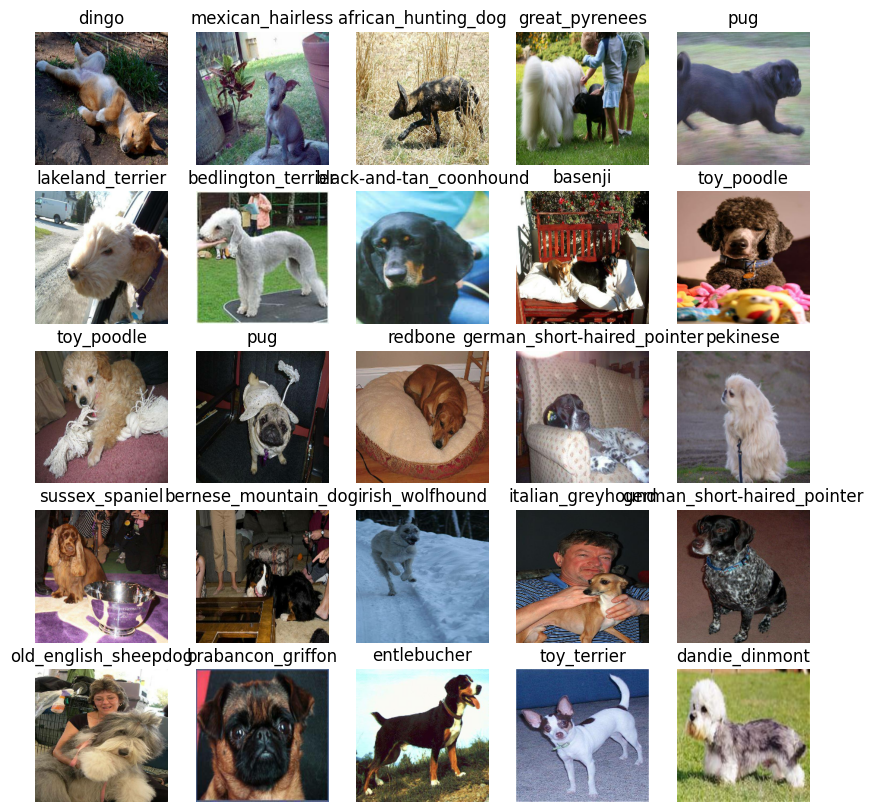

In [34]:
# visualize the data in the training batch
show_25_images(train_images,train_labels)

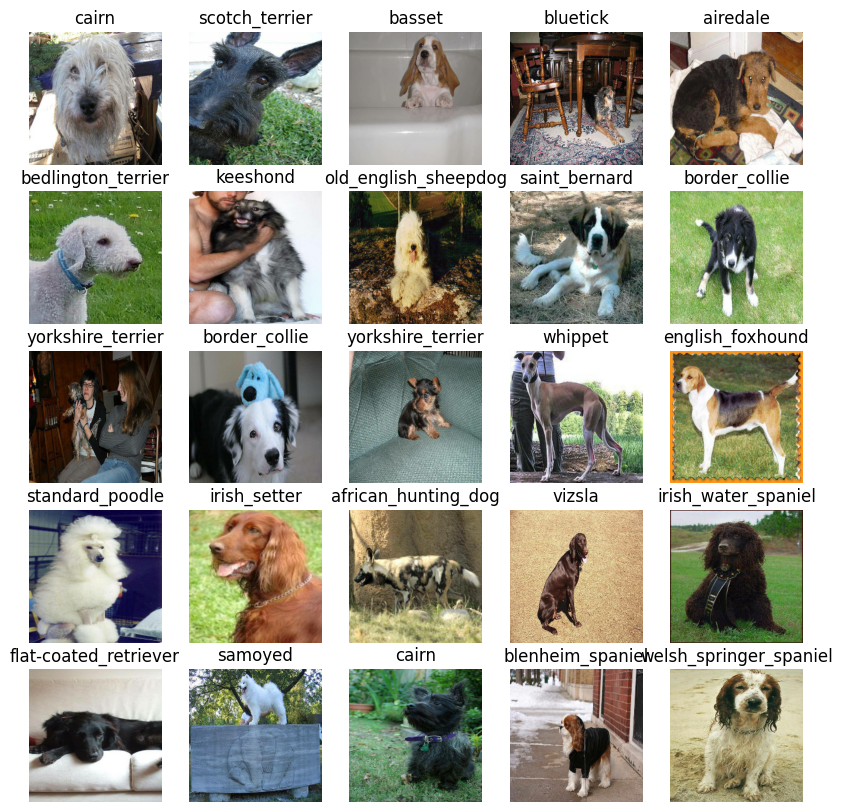

In [35]:
val_images,val_labels=next(valid_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## building a model
before we build the model, there are few things we need to define first:
 * the input shape(our image shape in the form of tensors) of our model
 * the output shape (image labels in the form of Tensors) of our model
 * the URL of the model we want to use

### preparing the input and output shape

In [36]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_breeds)

MODEL_URL=

SyntaxError: invalid syntax (2239504370.py, line 4)